<a href="https://colab.research.google.com/github/jaykkim1/KNOC_KPA_2025/blob/main/KPA_%EC%8B%A4%EC%8A%B5_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

In [ ]:
# 1. 데이터 불러오기
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})


In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


EDA 기본

In [ ]:

# 2. 기본 정보 확인
print("\n[데이터 상위 5개]\n")
df.head()


[데이터 상위 5개]



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
print("\n[데이터 정보]\n")
df.info()



[데이터 정보]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
print("데이터 형태:")
df.shape

데이터 형태:


(150, 5)

In [ ]:
print("\n데이터 타입 확인:\n")
df.dtypes



데이터 타입 확인:



,0
sepal length (cm),float64
sepal width (cm),float64
petal length (cm),float64
petal width (cm),float64
species,object


In [ ]:
print("\n결측치 확인:\n")
df.isnull().sum()



결측치 확인:



,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
species,0


In [ ]:
print("\n통계 요약:\n")
df.describe()


통계 요약:



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:

# 3. 각 species별 데이터 개수
print("\n품종별 데이터 개수:\n")
df['species'].value_counts()



품종별 데이터 개수:



,count
species,
setosa,50
versicolor,50
virginica,50


시각화

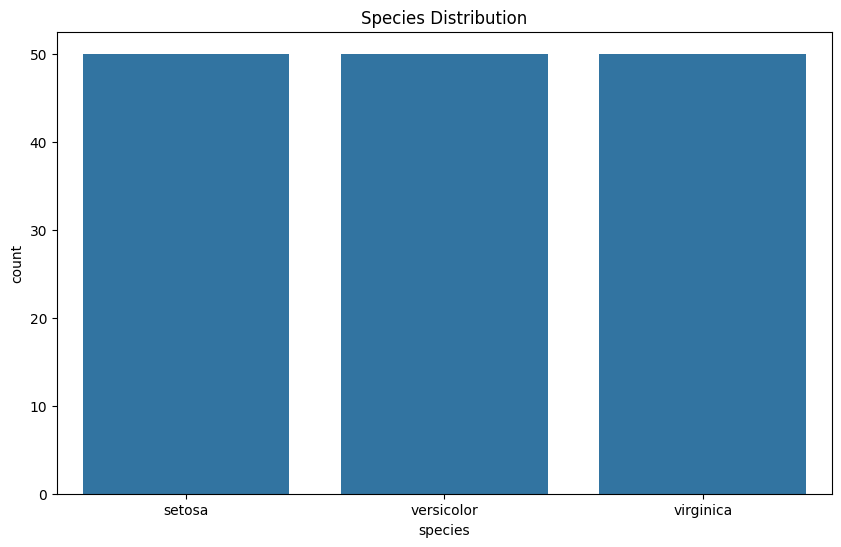

In [ ]:

# 4. 시각화
plt.figure(figsize=(10, 6))
sns.countplot(x="species", data=df)
plt.title("Species Distribution")
plt.show()


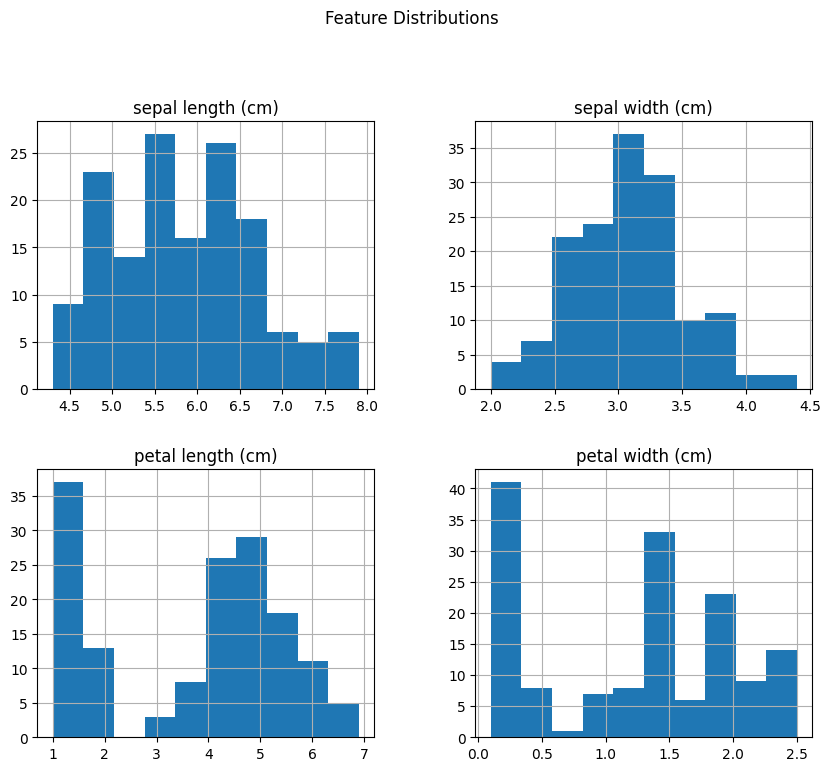

In [ ]:

# 5. 히스토그램 (특징별 분포)
df.hist(figsize=(10, 8))
plt.suptitle("Feature Distributions", y=1.02)
plt.show()


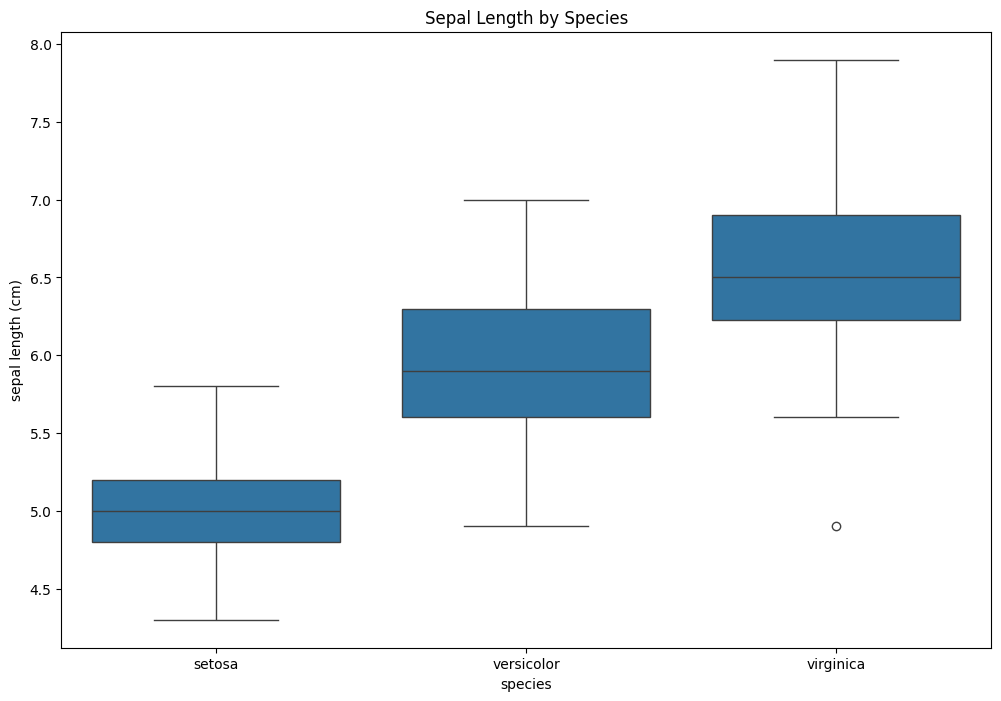

In [ ]:

# 6. 박스플롯 (species별 특징 차이 확인)
plt.figure(figsize=(12, 8))
sns.boxplot(x="species", y="sepal length (cm)", data=df)
plt.title("Sepal Length by Species")
plt.show()


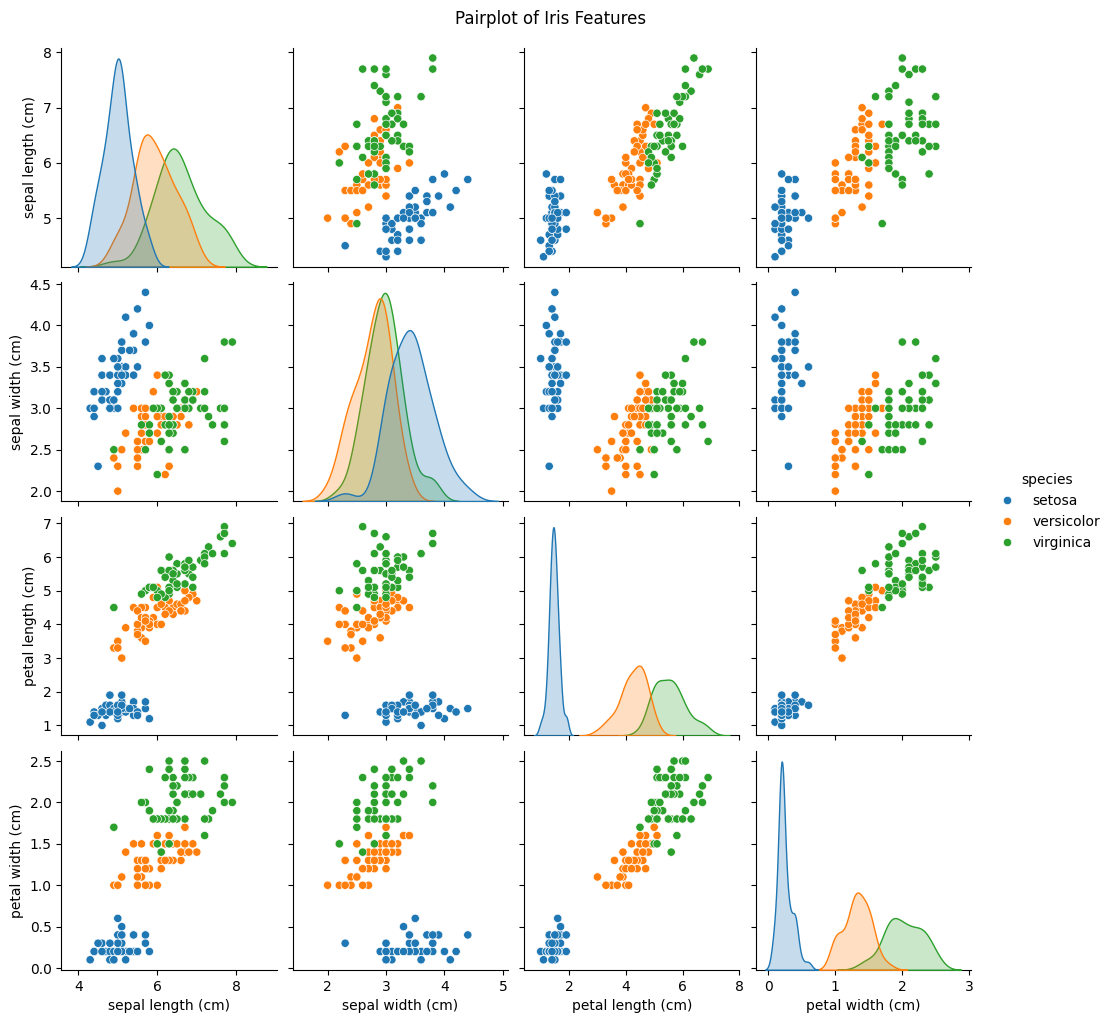

In [ ]:

# 7. 산점도 행렬 (pairplot)
sns.pairplot(df, hue="species", diag_kind="kde")
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()


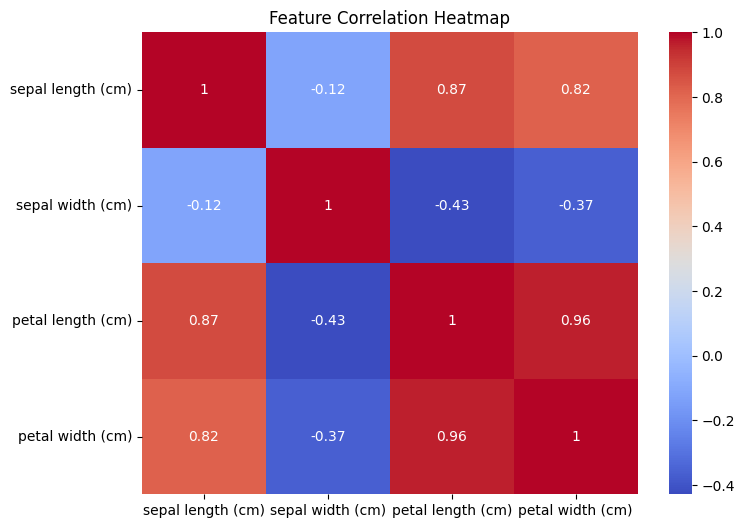

In [ ]:

# 8. 상관관계 heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop("species", axis=1).corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

차원축소: PCA

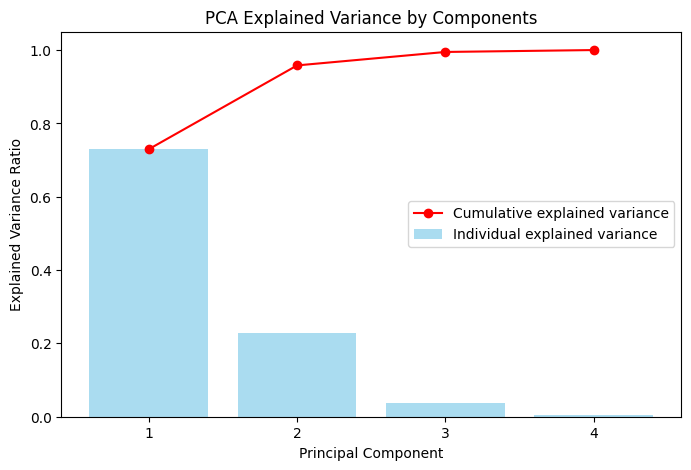

컴포넌트별 설명 분산비율:  [0.73 0.23 0.04 0.01]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# 예제 데이터셋 (Iris)
data = load_iris()
X = data.data

# 표준화
X_scaled = StandardScaler().fit_transform(X)

# PCA
pca = PCA(random_state=42)
X_pca = pca.fit_transform(X_scaled)

# 설명 분산 비율
explained_var = pca.explained_variance_ratio_
components = np.arange(1, len(explained_var) + 1)

# 바 그래프 시각화
plt.figure(figsize=(8,5))
plt.bar(components, explained_var, alpha=0.7, color='skyblue', label='Individual explained variance')
plt.plot(components, np.cumsum(explained_var), marker='o', color='red', label='Cumulative explained variance')

plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("PCA Explained Variance by Components")
plt.xticks(components)
plt.legend()
plt.show()
print('컴포넌트별 설명 분산비율: ', np.round(explained_var,2))

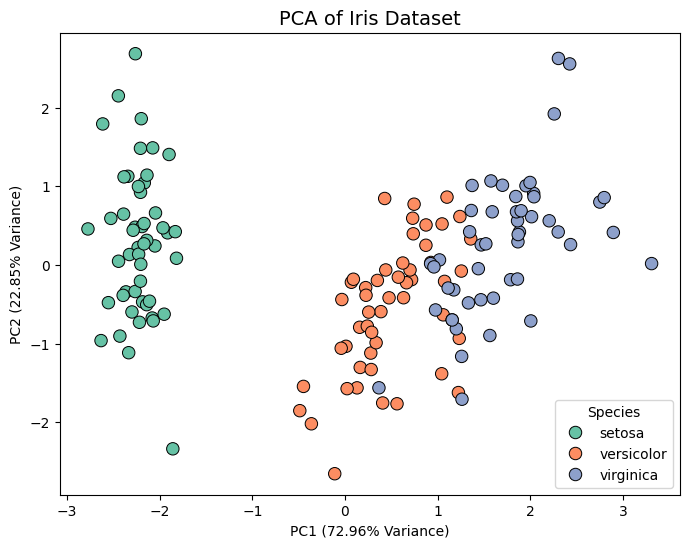

Explained variance ratio: [0.73 0.23]


In [ ]:
# PCA 실습
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# 1. 데이터 불러오기
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# 2. 특징(X)과 타겟(y) 분리
X = df.drop('species', axis=1)
y = df['species']

# 3. 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. PCA 적용 (차원 축소: 2차원)
pca = PCA(n_components=2, svd_solver='randomized', random_state=42)
X_pca = pca.fit_transform(X_scaled)

# 5. 결과 DataFrame 생성
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['species'] = y

# 6. 시각화
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='species',
    data=pca_df,
    palette='Set2',
    s=80,
    edgecolor='k'
)
plt.title("PCA of Iris Dataset", fontsize=14)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% Variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% Variance)")
plt.legend(title="Species")
plt.show()

# 7. 설명된 분산 비율 확인
print("Explained variance ratio:", np.round(pca.explained_variance_ratio_,2))


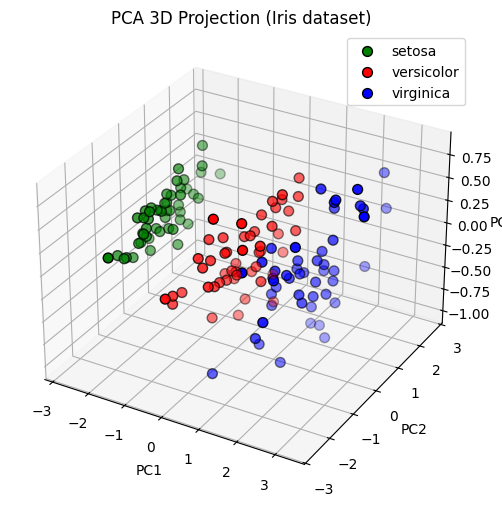

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# 데이터 로드
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 3차원 변환
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# 3D 시각화
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

colors = ['g','r',  'b']
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    ax.scatter(
        X_pca[y == i, 0],
        X_pca[y == i, 1],
        X_pca[y == i, 2],
        color=color,
        label=target_name,
        edgecolor='k',
        s=50
    )

ax.set_title("PCA 3D Projection (Iris dataset)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.legend()
plt.show()


K-means clustering

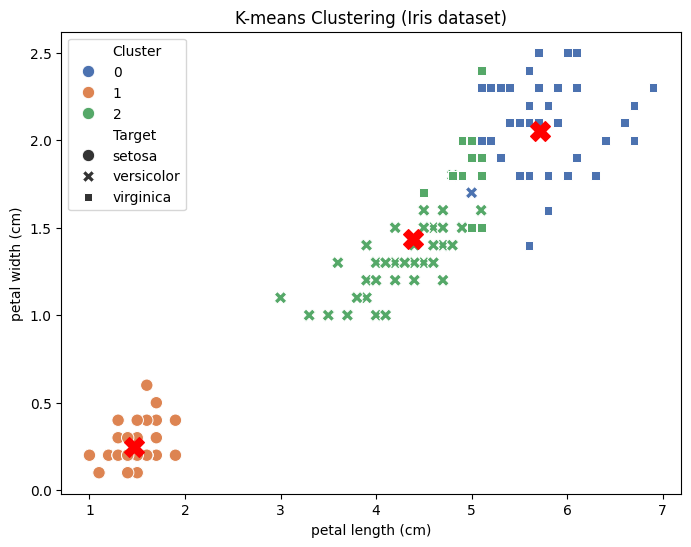

In [ ]:
# 원본 데이터로 3개 군집 분류

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd

# 데이터 불러오기
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# 특징(X)과 타겟(y) 분리
X = df.drop('species', axis=1)
y = df['species']

# K-means 모델 학습 (클러스터 3개)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# 클러스터 라벨
labels = kmeans.labels_

# 데이터프레임으로 변환 (시각화를 위해)
df = pd.DataFrame(X, columns=iris.feature_names)
df['Cluster'] = labels
df['Target'] = y

# 2D 시각화 (Petal length vs Petal width)
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['petal length (cm)'],
    y=df['petal width (cm)'],
    hue=df['Cluster'],
    palette="deep",
    style=df['Target'],  # 실제 species와 비교
    s=80
)

centers = kmeans.cluster_centers_  # shape: (3, 4)

# Petal length / width 기준으로 클러스터 중심 추출
centers_petal = centers[:, 2:4]  # 2: petal length, 3: petal width


# 클러스터 중심 표시
plt.scatter(
    centers_petal[:,0],  # Petal Length
    centers_petal[:,1],  # Petal Width
    c='red',
    s=200,
    marker='X'
)


plt.title("K-means Clustering (Iris dataset)")
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from scipy.stats import mode

# Target 문자열 → 숫자
target_num = df['Target'].map({'setosa':0, 'versicolor':1, 'virginica':2}).values

# 클러스터별 최빈값으로 실제 라벨 매핑
mapped_labels = np.zeros_like(labels)
for i in range(3):
    mask = (labels == i)
    mapped_labels[mask] = mode(target_num[mask])[0]

# 정확도 계산
accuracy = accuracy_score(target_num, mapped_labels)
print(f"K-means Clustering Accuracy: {accuracy:.4f}")


K-means Clustering Accuracy: 0.8867


군집분류: Kmeans clustering(PCA 차원축소 자료 사용)

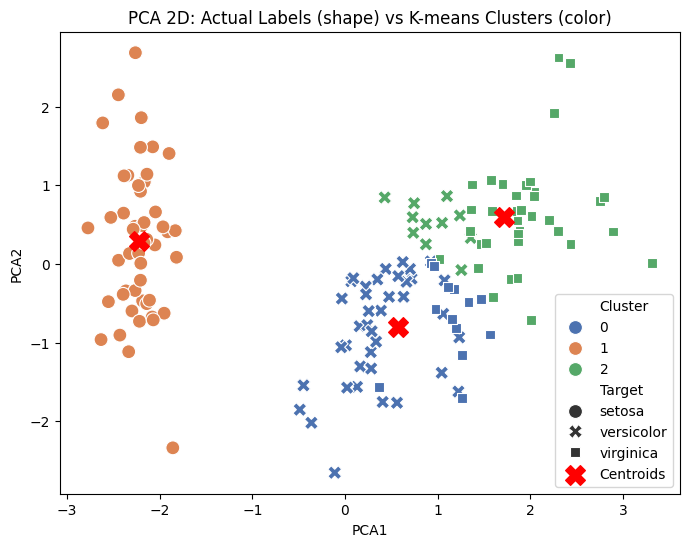

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 데이터 불러오기
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# 특징(X)과 타겟(y) 분리
X = df.drop('species', axis=1)
y = df['species']

# 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA (2차원)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# K-means 클러스터링
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)

# DataFrame 생성
df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df['Target'] = y
df['Cluster'] = clusters

# scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='Cluster',      # K-means cluster 색상
    style='Target',     # 실제 species 모양
    palette='deep',
    data=df,
    s=100
)

# 클러스터 중심 표시
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, marker='X', label='Centroids')

plt.title("PCA 2D: Actual Labels (shape) vs K-means Clusters (color)")
plt.legend()
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from scipy.stats import mode

# 문자열을 숫자로 변환
target_num = df['Target'].map({'setosa':0, 'versicolor':1, 'virginica':2}).values

# 클러스터별 최빈값으로 매핑
mapped_labels = np.zeros_like(clusters)
for i in range(3):
    mask = (clusters == i)
    mapped_labels[mask] = mode(target_num[mask])[0]

# 정확도 계산
accuracy = accuracy_score(target_num, mapped_labels)
print(f"K-means Clustering Accuracy: {accuracy:.4f}")


K-means Clustering Accuracy: 0.8333
